<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1">Introduction</a></span></li><li><span><a href="#VaR---Value-at-Risk" data-toc-modified-id="VaR---Value-at-Risk-2">VaR - Value at Risk</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-3">Imports</a></span></li><li><span><a href="#Loading-the-data" data-toc-modified-id="Loading-the-data-4">Loading the data</a></span></li><li><span><a href="#Modelling" data-toc-modified-id="Modelling-5">Modelling</a></span><ul class="toc-item"><li><span><a href="#Variance-Covariance-Method" data-toc-modified-id="Variance-Covariance-Method-5.1">Variance-Covariance Method</a></span></li><li><span><a href="#Historical-Simulation-VaR" data-toc-modified-id="Historical-Simulation-VaR-5.2">Historical Simulation VaR</a></span></li><li><span><a href="#Monte-Carlo-VaR" data-toc-modified-id="Monte-Carlo-VaR-5.3">Monte Carlo VaR</a></span></li></ul></li><li><span><a href="#References" data-toc-modified-id="References-6">References</a></span></li></ul></div>

# Introduction
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-warning">
<font color=black>

**What?** VaR - Value at Risk modelling methods

</font>
</div>

# VaR - Value at Risk
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=bla ck>

- VaR addresses one of the most common questions an investor has: what is the maximum expected loss of my investment? Suppose that a daily VaR of an investment is 1 million with 95% confidence interval. This would read as there being a 5% chance that an investor might incur a loss greater than $1 million in a day.
- The VaR  has two important characteristics: to provide a common consistent measure of risk across different positions and it takes account of the correlations between different risk factors.
- In summary:
    - VaR needs an estimation of the probability of loss.
    - VaR concentrates on the potential losses not on realised losses
- VaR has three key ingredients:
    1. Standard deviation that defines the level of loss
    2. Fixed time horizon over which risk is assessed
    3. Confidence interval.

</font>
</div>

# Imports
<hr style = "border:2px solid black" ></hr>

In [1]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import yfinance as yf
from scipy.stats import norm
import requests
from io import StringIO
import seaborn as sns; sns.set()
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

# Loading the data
<hr style = "border:2px solid black" ></hr>

In [2]:
def getDailyData(symbol, start, end):
    pd = pdr.get_data_yahoo(symbol, start, end)
    return pd

In [3]:
getDailyData(["IBM", "MSFT", "INTC"], '2020-01-01', '2020-12-21')

Attributes   Adj Close                              Close              \
Symbols            IBM        MSFT       INTC         IBM        MSFT   
Date                                                                    
2020-01-02  112.916939  156.592026  56.406242  129.464630  160.619995   
2020-01-03  112.016403  154.642166  55.720173  128.432129  158.619995   
2020-01-06  111.816284  155.041901  55.562565  128.202682  159.029999   
2020-01-07  111.891319  153.628250  54.635433  128.288712  157.580002   
2020-01-08  112.825218  156.075333  54.672531  129.359467  160.089996   
...                ...         ...        ...         ...         ...   
2020-12-15  110.510719  210.971634  48.145493  120.391968  214.130005   
2020-12-16  110.177246  216.045654  48.573074  120.028679  219.279999   
2020-12-17  110.177246  216.183578  48.126495  120.028679  219.419998   
2020-12-18  110.440521  215.365829  45.095428  120.315491  218.589996   
2020-12-21  108.281731  219.306824  44.050232  117.963669  222.589996   

Attributes                   High                                Low  \
Symbols          INTC         IBM        MSFT       INTC         IBM   
Date                                                                   
2020-01-02  60.840000  129.942642  160.729996  60.970001  128.843216   
2020-01-03  60.099998  128.929260  159.949997  60.700001  127.686424   
2020-01-06  59.930000  128.336517  159.100006  60.200001  127.342255   
2020-01-07  58.930000  129.024857  159.669998  59.799999  127.533463   
2020-01-08  58.970001  129.885284  160.800003  59.320000  128.030594   
...               ...         ...         ...        ...         ...   
2020-12-15  50.669998  120.391968  215.419998  51.009998  118.011475   
2020-12-16  51.119999  121.003822  220.110001  51.459999  119.780113   
2020-12-17  50.650002  120.544930  220.889999  51.320000  119.416824   
2020-12-18  47.459999  120.841301  219.690002  50.680000  119.474190   
2020-12-21  46.360001  118.718925  224.000000  46.450001  116.367111   

Attributes                               Open                         \
Symbols           MSFT       INTC         IBM        MSFT       INTC   
Date                                                                   
2020-01-02  158.330002  60.220001  129.063095  158.779999  60.240002   
2020-01-03  158.059998  59.810001  127.695984  158.320007  59.810001   
2020-01-06  156.509995  59.330002  127.552582  157.080002  59.590000   
2020-01-07  157.320007  58.889999  127.810707  159.320007  59.779999   
2020-01-08  157.949997  58.520000  128.594650  158.929993  58.889999   
...                ...        ...         ...         ...        ...   
2020-12-15  212.240005  50.209999  118.919693  215.169998  50.980000   
2020-12-16  214.720001  50.680000  120.391968  214.750000  50.709999   
2020-12-17  217.919998  50.220001  120.535370  219.869995  51.150002   
2020-12-18  216.020004  47.110001  120.066925  218.589996  50.570000   
2020-12-21  217.279999  45.240002  118.518166  217.550003  46.320000   

Attributes     Volume                           
Symbols           IBM        MSFT         INTC  
Date                                            
2020-01-02  3293436.0  22622100.0   18056000.0  
2020-01-03  2482890.0  21116200.0   15293900.0  
2020-01-06  2537073.0  20813700.0   17755200.0  
2020-01-07  3232977.0  21634100.0   21876100.0  
2020-01-08  4545916.0  27746500.0   23133500.0  
...               ...         ...          ...  
2020-12-15  4556585.0  27000600.0   25465600.0  
2020-12-16  4738485.0  35023300.0   28351000.0  
2020-12-17  3962248.0  32515800.0   26399000.0  
2020-12-18  7900229.0  63354900.0  119298400.0  
2020-12-21  6397022.0  37181900.0   53775700.0  

[246 rows x 18 columns]

In [4]:
stocks = getDailyData(["IBM", "MSFT", "INTC"], '2020-01-01', '2020-12-31')["Close"]

In [5]:
# Calculating logarithmic return; normalising data so they are comparable
stocks_returns = (np.log(stocks) - np.log(stocks.shift(1))).dropna()

In [6]:
stocks

Symbols,IBM,MSFT,INTC
Date,,,
2020-01-02,129.464630,160.619995,60.840000
2020-01-03,128.432129,158.619995,60.099998
2020-01-06,128.202682,159.029999,59.930000
2020-01-07,128.288712,157.580002,58.930000
2020-01-08,129.359467,160.089996,58.970001
...,...,...,...
2020-12-24,119.206497,222.750000,47.070000
2020-12-28,119.330788,224.960007,47.070000
2020-12-29,118.355644,224.149994,49.389999


In [7]:
stocks_returns

Symbols,IBM,MSFT,INTC
Date,,,
2020-01-03,-0.008007,-0.012530,-0.012238
2020-01-06,-0.001788,0.002581,-0.002833
2020-01-07,0.000671,-0.009160,-0.016827
2020-01-08,0.008312,0.015803,0.000679
2020-01-09,0.010513,0.012416,0.005580
...,...,...,...
2020-12-24,0.006356,0.007797,0.010679
2020-12-28,0.001042,0.009873,0.000000
2020-12-29,-0.008205,-0.003607,0.048112


# Modelling
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=bla ck>

- VaR can be measured using three different approaches:
    - Variance-covariance VaR
    - Historical simulation VaR
    - Monte Carlo VaR

</font>
</div>

## Variance-Covariance Method

<div class="alert alert-info">
<font color=bla ck>

- The variance-covariance method is also known as the parametric method, because observations are assumed to be normally distributed. 
- The normality assumption makes things easier, but it is a strong assumption, as there is no guarantee that asset returns are normally distributed; rather, most asset returns do not follow a normal distribution.
- This method changes depending on the time horizon in the sense that holding assets for a longer period makes an investor more susceptible to risk. The increase is poportional to squared-root of the holding period; we'll use 30 here. 
    
</font>
</div>

In [8]:
stocks_returns_mean = stocks_returns.mean()
# Drawing random numbers for weights
weights  = np.random.random(len(stocks_returns.columns))
# Generating weights
weights /= np.sum(weights)
# Calculating covariance matrix
cov_var = stocks_returns.cov()
# Finding the portfolio standard deviation
port_std = np.sqrt(weights.T.dot(cov_var).dot(weights))

In [9]:
weights

array([0.60730041, 0.1914202 , 0.2012794 ])

In [10]:
initial_investment = 1e6
conf_level = 0.95

In [11]:
def VaR_parametric(initial_investment, conf_level):
    # Computing the Z-score for a specific value using the percent point function (ppf)
    alpha = norm.ppf(1 - conf_level, stocks_returns_mean, port_std)
    for i, j in zip(stocks.columns, range(len(stocks.columns))):
        VaR_param = (initial_investment - initial_investment *
                     (1 + alpha))[j]
        print("Parametric VaR result for {} is {} "
              .format(i, VaR_param))
    VaR_param = (initial_investment - initial_investment * (1 + alpha))
    print('--' * 25)
    return VaR_param

In [12]:
VaR_param = VaR_parametric(initial_investment, conf_level)
VaR_param

Parametric VaR result for IBM is 41337.36289289151 
Parametric VaR result for MSFT is 39755.703443002305 
Parametric VaR result for INTC is 41840.454030257766 
--------------------------------------------------


array([41337.36289289, 39755.703443  , 41840.45403026])

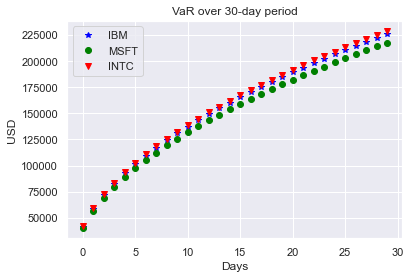

In [13]:
var_horizon = []
time_horizon = 30
for j in range(len(stocks_returns.columns)):
    for i in range(1, time_horizon + 1):
        var_horizon.append(VaR_param[j] * np.sqrt(i))
plt.plot(var_horizon[:time_horizon], "o",
         c='blue', marker='*', label='IBM')
plt.plot(var_horizon[time_horizon:time_horizon + 30], "o",
         c='green', marker='o', label='MSFT')
plt.plot(var_horizon[time_horizon + 30:time_horizon + 60], "o",
         c='red', marker='v', label='INTC')
plt.xlabel("Days")
plt.ylabel("USD")
plt.title("VaR over 30-day period")
plt.legend()
plt.show()

## Historical Simulation VaR

<div class="alert alert-info">
<font color=bla ck>

- There is another method that **does not** have a normality assumption, namely the historical simulation VaR model.
- We find the percentile, which is the Z-table equivalent of variance-covariance method. Suppose that the confidence interval is 95%; 5% will be used in lieu of the Z-table values, and all we need to do is to multiply this percentile by the initial investment.
- The downside is that it requires a large sample.
    
</font>
</div>

In [14]:
def VaR_historical(initial_investment, conf_level):
    Hist_percentile95 = []
    for i, j in zip(stocks_returns.columns,
                    range(len(stocks_returns.columns))):
        Hist_percentile95.append(np.percentile(stocks_returns.loc[:, i],
                                               5))
        print("Based on historical values 95% of {}'s return is {:.4f}"
              .format(i, Hist_percentile95[j]))
        VaR_historical = (initial_investment - initial_investment *
                          (1 + Hist_percentile95[j]))
        print("Historical VaR result for {} is {:.2f} "
              .format(i, VaR_historical))
        print('--' * 35)

In [15]:
VaR_historical(initial_investment,conf_level)

Based on historical values 95% of IBM's return is -0.0371
Historical VaR result for IBM is 37081.56 
----------------------------------------------------------------------
Based on historical values 95% of MSFT's return is -0.0426
Historical VaR result for MSFT is 42583.69 
----------------------------------------------------------------------
Based on historical values 95% of INTC's return is -0.0425
Historical VaR result for INTC is 42485.35 
----------------------------------------------------------------------


## Monte Carlo VaR

<div class="alert alert-info">
<font color=bla ck>

- From the application standpoint, Monte Carlo is very similar to the historical simulation VaR, but it does not use historical observations. 
    
- Rather, it generates random samples from a given distribution.

</font>
</div>

In [16]:
sim_data = pd.DataFrame([])
num_reps = 1000
n = 100
for i in range(len(stocks.columns)):
    mean = np.random.randn(n).mean()
    std = np.random.randn(n).std()
    temp = pd.DataFrame(np.random.normal(mean, std, num_reps))
    sim_data = pd.concat([sim_data,   temp], axis=1)
sim_data.columns = ['Simulation 1', 'Simulation 2', 'Simulation 3']

In [17]:
sim_data

,Simulation 1,Simulation 2,Simulation 3
0,1.076322,0.725696,-0.751083
1,-1.150385,0.947843,0.285487
2,-0.157978,2.575699,-1.861822
3,-0.984060,1.357537,0.282705
4,0.850287,-0.734882,0.503470
...,...,...,...
995,-0.053340,1.513616,-0.009282
996,0.208471,-1.540035,-0.245926
997,-0.886967,0.310172,-0.186657
998,-0.676301,-1.026521,-0.043548


In [18]:
def MC_VaR(initial_investment, conf_level):
    MC_percentile95 = []
    for i, j in zip(sim_data.columns, range(len(sim_data.columns))):
        MC_percentile95.append(np.percentile(sim_data.loc[:, i], 5))
        print("Based on simulation 95% of {}'s return is {:.4f}"
              .format(i, MC_percentile95[j]))
        VaR_MC = (initial_investment - initial_investment * 
                  (1 + MC_percentile95[j]))
        print("Simulation VaR result for {} is {:.2f} "
              .format(i, VaR_MC))
        print('--' * 35)

In [19]:
MC_VaR(initial_investment, conf_level)

Based on simulation 95% of Simulation 1's return is -1.6155
Simulation VaR result for Simulation 1 is 1615467.04 
----------------------------------------------------------------------
Based on simulation 95% of Simulation 2's return is -1.5562
Simulation VaR result for Simulation 2 is 1556248.94 
----------------------------------------------------------------------
Based on simulation 95% of Simulation 3's return is -1.7474
Simulation VaR result for Simulation 3 is 1747395.86 
----------------------------------------------------------------------


# References
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-warning">
<font color=black>

- https://github.com/abdullahkarasan/mlfrm/blob/main/codes/chp_5.ipynb
- Machine Learning for Financial Risk Management with Python Abdullah Karasan
- https://www.quantstart.com/articles/Value-at-Risk-VaR-for-Algorithmic-Trading-Risk-Management-Part-I/
- [Using Bidirectional Generative Adversarial Networks to estimate Value-at-Risk for Market Risk Management](https://medium.com/towards-data-science/using-bidirectional-generative-adversarial-networks-to-estimate-value-at-risk-for-market-risk-c3dffbbde8dd)
    
</font>
</div>